# Régression Linéaire et Modèles Backward, Forward et Stepwise

## Importation des modules et chargement des données

In [116]:
import numpy as np # Pour les calculs mathématiques
import matplotlib.pyplot as plt # Pour les graphiques
import pandas as pd # Pour la manipulation de tableaux de données

import scipy.stats as scy # Pour les lois de probabilités et des tests statistiques
import itertools
import statsmodels.api as sm

from statsmodels.api import OLS # Pour la régression linéaire (avec statsmodels)
from statsmodels.stats.outliers_influence import variance_inflation_factor # Pour les VIF
from statsmodels.tools.tools import add_constant # Pour l'ajout d'une constante dans statsmodels
from statsmodels.stats.api import het_breuschpagan # Pour le test de Breusch-Pagan


from sklearn.linear_model import LinearRegression # Pour la régression linéaire (avec sklearn)
from sklearn.preprocessing import PolynomialFeatures # Pour le "feature engineering" polynomial
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error # Pour les critères d'erreur

In [117]:
data = pd.read_csv('Data/train_cleaned.csv')

## Régression Linéaire Multiple

In [118]:
# Calcul des AIC et BIC

def AIC_BIC_linreg(X, y, features):
    linreg_model = OLS(y, X[list(features)])
    linreg = linreg_model.fit()
    AIC = linreg.aic
    BIC = linreg.bic
    return {'model':linreg, 'AIC':AIC, 'BIC':BIC}

In [119]:
var_Y= 'prix'
Y = data[var_Y]

var_X_comp = ['nb_chambres', 'nb_sdb', 'm2_interieur', 'm2_jardin', 'm2_etage', 'm2_soussol', 'nb_etages', 'vue_mer', 'vue_note', 'etat_note', 'design_note', 'annee_construction', 'annee_renovation', 'm2_interieur_15voisins', 'm2_jardin_15voisins', 'zipcode', 'lat', 'long']
X_comp = data[var_X_comp]

In [120]:
linreg_comp_model = OLS(Y, add_constant(X_comp))
linreg_comp = linreg_comp_model.fit()
linreg_comp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   prix   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     2019.
Date:                Wed, 03 Apr 2024   Prob (F-statistic):               0.00
Time:                        19:34:20   Log-Likelihood:            -2.1700e+05
No. Observations:               16112   AIC:                         4.340e+05
Df Residuals:                   16093   BIC:                         4.342e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   3.736e+06   2.91e+06      1.283      0.199   -1.97e+06    9.44e+06
nb_chambres            -2.041e+04   2076.303     -9.831      0.000   -2.45e+04   -1.63e+04
nb_sdb                  3.314e+04   3317.098      9.991      0.000    2.66e+04    3.96e+04
m2_interieur            2504.0769   4017.598      0.623      0.533   -5370.862    1.04e+04
m2_jardin                  1.4642      1.439      1.017      0.309      -1.357       4.286
m2_etage               -1136.6096   4014.186     -0.283      0.777   -9004.861    6731.642
m2_soussol             -1318.3283   4037.333     -0.327      0.744   -9231.950    6595.293
nb_etages               1.672e+04   3654.194      4.577      0.000    9561.949    2.39e+04
vue_mer                 4.463e+05   1.82e+04     24.482      0.000    4.11e+05    4.82e+05
vue_note                 6.03e+04   2415.843     24.960      0.000    5.56e+04     6.5e+04
etat_note               3.412e+04   2419.746     14.099      0.000    2.94e+04    3.89e+04
design_note             1.037e+05   2237.988     46.344      0.000    9.93e+04    1.08e+05
annee_construction     -2391.0532     73.150    -32.687      0.000   -2534.435   -2247.671
annee_renovation          24.8119      3.594      6.904      0.000      17.767      31.856
m2_interieur_15voisins   448.9974     38.666     11.612      0.000     373.208     524.787
m2_jardin_15voisins      -13.6780      2.215     -6.176      0.000     -18.019      -9.337
zipcode                 -497.7332     32.421    -15.352      0.000    -561.282    -434.185
lat                     6.044e+05   1.06e+04     57.112      0.000    5.84e+05    6.25e+05
long                   -1.659e+05   1.34e+04    -12.411      0.000   -1.92e+05    -1.4e+05
==============================================================================
Omnibus:                     8461.089   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           140513.914
Skew:                           2.142   Prob(JB):                         0.00
Kurtosis:                      16.818   Cond. No.                     2.12e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [121]:
print('Features of the complete model:', linreg_comp.model.exog_names)
print('Number of parameter of the complete model:', linreg_comp.params.shape[0])

Features of the complete model: ['const', 'nb_chambres', 'nb_sdb', 'm2_interieur', 'm2_jardin', 'm2_etage', 'm2_soussol', 'nb_etages', 'vue_mer', 'vue_note', 'etat_note', 'design_note', 'annee_construction', 'annee_renovation', 'm2_interieur_15voisins', 'm2_jardin_15voisins', 'zipcode', 'lat', 'long']
Number of parameter of the complete model: 19


### Suppression des variables non significatives

In [122]:
# On retire m2_etage

var_X_comp = ['nb_chambres', 'nb_sdb', 'm2_interieur', 'm2_jardin', 'm2_soussol', 'nb_etages', 'vue_mer', 'vue_note', 'etat_note', 'design_note', 'annee_construction', 'annee_renovation', 'm2_interieur_15voisins', 'm2_jardin_15voisins', 'zipcode', 'lat', 'long']
X_comp = data[var_X_comp]
linreg_comp_model = OLS(Y, add_constant(X_comp))
linreg_comp = linreg_comp_model.fit()
linreg_comp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   prix   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     2138.
Date:                Wed, 03 Apr 2024   Prob (F-statistic):               0.00
Time:                        19:34:20   Log-Likelihood:            -2.1700e+05
No. Observations:               16112   AIC:                         4.340e+05
Df Residuals:                   16094   BIC:                         4.342e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   3.704e+06   2.91e+06      1.273      0.203      -2e+06    9.41e+06
nb_chambres            -2.042e+04   2076.004     -9.837      0.000   -2.45e+04   -1.64e+04
nb_sdb                  3.319e+04   3312.498     10.020      0.000    2.67e+04    3.97e+04
m2_interieur            1366.5667     43.099     31.707      0.000    1282.087    1451.046
m2_jardin                  1.4670      1.439      1.019      0.308      -1.354       4.288
m2_soussol              -175.2480     48.690     -3.599      0.000    -270.685     -79.811
nb_etages                1.67e+04   3652.892      4.571      0.000    9538.010    2.39e+04
vue_mer                 4.464e+05   1.82e+04     24.484      0.000    4.11e+05    4.82e+05
vue_note                6.029e+04   2415.234     24.960      0.000    5.56e+04     6.5e+04
etat_note               3.411e+04   2419.557     14.098      0.000    2.94e+04    3.89e+04
design_note             1.037e+05   2237.097     46.370      0.000    9.94e+04    1.08e+05
annee_construction     -2390.9544     73.147    -32.687      0.000   -2534.331   -2247.578
annee_renovation          24.7986      3.593      6.901      0.000      17.755      31.842
m2_interieur_15voisins   449.0859     38.663     11.615      0.000     373.301     524.870
m2_jardin_15voisins      -13.6915      2.214     -6.184      0.000     -18.031      -9.352
zipcode                 -497.4840     32.408    -15.351      0.000    -561.007    -433.961
lat                     6.044e+05   1.06e+04     57.118      0.000    5.84e+05    6.25e+05
long                    -1.66e+05   1.34e+04    -12.416      0.000   -1.92e+05    -1.4e+05
==============================================================================
Omnibus:                     8458.970   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           140385.370
Skew:                           2.142   Prob(JB):                         0.00
Kurtosis:                      16.812   Cond. No.                     2.12e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [123]:
# On retire m2_jardin

var_X_comp = ['nb_chambres', 'nb_sdb', 'm2_interieur', 'm2_soussol', 'nb_etages', 'vue_mer', 'vue_note', 'etat_note', 'design_note', 'annee_construction', 'annee_renovation', 'm2_interieur_15voisins', 'm2_jardin_15voisins', 'zipcode', 'lat', 'long']
X_comp = data[var_X_comp]
linreg_comp_model = OLS(Y, add_constant(X_comp))
linreg_comp = linreg_comp_model.fit()
linreg_comp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   prix   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     2271.
Date:                Wed, 03 Apr 2024   Prob (F-statistic):               0.00
Time:                        19:34:20   Log-Likelihood:            -2.1700e+05
No. Observations:               16112   AIC:                         4.340e+05
Df Residuals:                   16095   BIC:                         4.342e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   3.827e+06   2.91e+06      1.317      0.188   -1.87e+06    9.53e+06
nb_chambres            -2.047e+04   2075.408     -9.864      0.000   -2.45e+04   -1.64e+04
nb_sdb                  3.319e+04   3312.502     10.020      0.000    2.67e+04    3.97e+04
m2_interieur            1369.7521     42.986     31.865      0.000    1285.495    1454.009
m2_soussol              -176.7302     48.668     -3.631      0.000    -272.125     -81.335
nb_etages                1.66e+04   3651.612      4.546      0.000    9441.821    2.38e+04
vue_mer                 4.461e+05   1.82e+04     24.471      0.000     4.1e+05    4.82e+05
vue_note                6.033e+04   2414.771     24.985      0.000    5.56e+04    6.51e+04
etat_note               3.407e+04   2419.269     14.083      0.000    2.93e+04    3.88e+04
design_note             1.038e+05   2237.048     46.378      0.000    9.94e+04    1.08e+05
annee_construction     -2393.9416     73.088    -32.754      0.000   -2537.203   -2250.680
annee_renovation          24.7926      3.593      6.899      0.000      17.749      31.836
m2_interieur_15voisins   447.1443     38.616     11.579      0.000     371.452     522.837
m2_jardin_15voisins      -12.0799      1.550     -7.794      0.000     -15.118      -9.042
zipcode                 -497.7661     32.407    -15.360      0.000    -561.287    -434.245
lat                     6.041e+05   1.06e+04     57.111      0.000    5.83e+05    6.25e+05
long                   -1.654e+05   1.34e+04    -12.383      0.000   -1.92e+05   -1.39e+05
==============================================================================
Omnibus:                     8455.123   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           140091.862
Skew:                           2.141   Prob(JB):                         0.00
Kurtosis:                      16.796   Cond. No.                     2.12e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [124]:
# On retire const

var_X_comp = ['nb_chambres', 'nb_sdb', 'm2_interieur', 'm2_soussol', 'nb_etages', 'vue_mer', 'vue_note', 'etat_note', 'design_note', 'annee_construction', 'annee_renovation', 'm2_interieur_15voisins', 'm2_jardin_15voisins', 'zipcode', 'lat', 'long']
X_comp = data[var_X_comp]
linreg_comp_model = OLS(Y, X_comp)
linreg_comp = linreg_comp_model.fit()
linreg_comp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   prix   R-squared (uncentered):                   0.921
Model:                            OLS   Adj. R-squared (uncentered):              0.921
Method:                 Least Squares   F-statistic:                          1.178e+04
Date:                Wed, 03 Apr 2024   Prob (F-statistic):                        0.00
Time:                        19:34:20   Log-Likelihood:                     -2.1701e+05
No. Observations:               16112   AIC:                                  4.340e+05
Df Residuals:                   16096   BIC:                                  4.342e+05
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
nb_chambres            -2.028e+04   2070.208     -9.795      0.000   -2.43e+04   -1.62e+04
nb_sdb                  3.318e+04   3312.571     10.018      0.000    2.67e+04    3.97e+04
m2_interieur            1371.5214     42.966     31.921      0.000    1287.304    1455.739
m2_soussol              -186.5591     48.093     -3.879      0.000    -280.827     -92.291
nb_etages               1.577e+04   3596.640      4.384      0.000    8717.812    2.28e+04
vue_mer                  4.46e+05   1.82e+04     24.468      0.000     4.1e+05    4.82e+05
vue_note                6.002e+04   2402.800     24.978      0.000    5.53e+04    6.47e+04
etat_note               3.456e+04   2390.462     14.458      0.000    2.99e+04    3.92e+04
design_note             1.035e+05   2231.712     46.398      0.000    9.92e+04    1.08e+05
annee_construction     -2359.6177     68.283    -34.556      0.000   -2493.460   -2225.775
annee_renovation          25.1553      3.583      7.021      0.000      18.132      32.178
m2_interieur_15voisins   455.6390     38.075     11.967      0.000     381.009     530.269
m2_jardin_15voisins      -11.8521      1.540     -7.695      0.000     -14.871      -8.833
zipcode                 -462.2760     17.992    -25.693      0.000    -497.542    -427.010
lat                     6.038e+05   1.06e+04     57.095      0.000    5.83e+05    6.25e+05
long                   -1.678e+05   1.32e+04    -12.677      0.000   -1.94e+05   -1.42e+05
==============================================================================
Omnibus:                     8461.541   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           140203.402
Skew:                           2.143   Prob(JB):                         0.00
Kurtosis:                      16.801   Cond. No.                     1.33e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.33e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

On ne retire pas d'autre covariable. 

In [125]:
# AIC et BIC du modèle complet

AIC_comp = round(linreg_comp.aic, ndigits=1)
BIC_comp = round(linreg_comp.bic, ndigits=1)

print('AIC de la régression linéaire complète :', BIC_comp)
print('BIC de la régression linéaire complète :', AIC_comp) 

AIC de la régression linéaire complète : 434166.4
BIC de la régression linéaire complète : 434043.4


C'est très élevé, le modèle n'est donc pas très performant à priori.

## Amélioration du modèle complet

In [126]:
alpha = 0.05
n = data.shape[0]
p = 4
influence = linreg_comp.get_influence()

### Détection des données atypiques et influentes

#### Méthode des Leviers

In [127]:
levier = influence.hat_matrix_diag
seuil_levier = 2*p/n

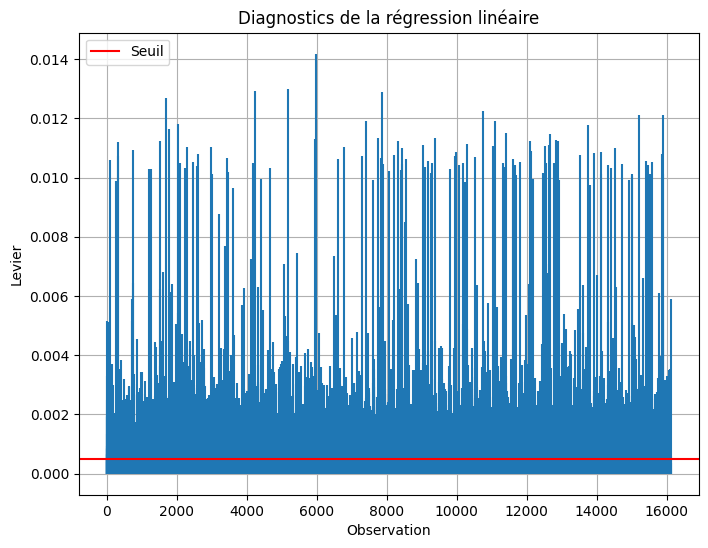

In [128]:
plt.subplots(figsize=(8, 6))
plt.vlines(range(n), 0, levier)
plt.axhline(y=seuil_levier, label='Seuil', color='red')
plt.grid()
plt.xlabel('Observation')
plt.ylabel('Levier')
plt.title('Diagnostics de la régression linéaire')
plt.legend(loc='upper left')
plt.show()

In [129]:
too_high = np.where(levier > seuil_levier)
nb_too_high = np.shape(too_high)[1]
pourcentage_too_high = nb_too_high/n*100

print(round(pourcentage_too_high,3), '% dépassent le seuil de levier')
if pourcentage_too_high > 5:
    print('ATTENTION BEAUCOUP DE DONNEES ATYPIQUES')


76.359 % dépassent le seuil de levier
ATTENTION BEAUCOUP DE DONNEES ATYPIQUES


#### Résidus Studentisés

In [130]:
rstudent = influence.resid_studentized_external
seuil_rstudent = scy.t.ppf(1-alpha/2, df=n-p-1)

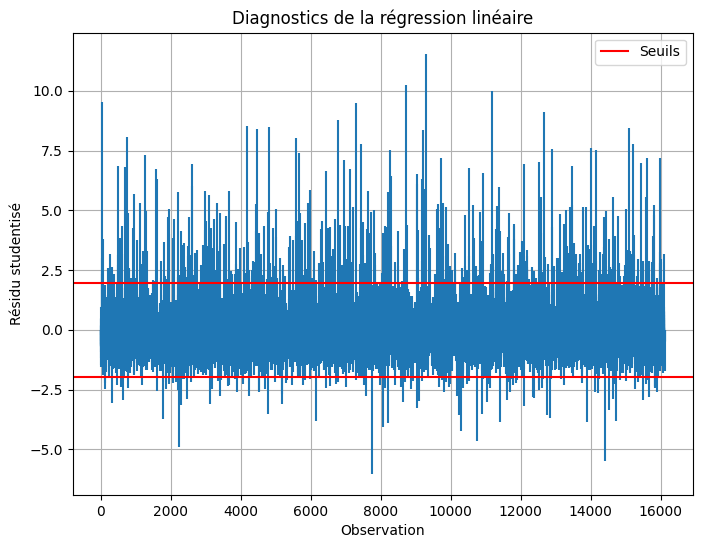

In [131]:
plt.subplots(figsize=(8, 6))
plt.vlines(range(n), 0, rstudent)
plt.axhline(y=seuil_rstudent, label='Seuils', color='red')
plt.axhline(y=-seuil_rstudent, color='red')
plt.grid()
plt.xlabel('Observation')
plt.ylabel('Résidu studentisé')
plt.title('Diagnostics de la régression linéaire')
plt.legend(loc='best')
plt.show()

In [132]:
print('Observations avec un résidu studentisé dépassant les seuils :')
too_high = np.where(rstudent > seuil_rstudent)
nb_too_high = np.shape(too_high)[1]
pourcentage_too_high = nb_too_high/n*100

print(round(pourcentage_too_high,3), '% dépassent le seuil de levier')
if pourcentage_too_high > 5:
    print('ATTENTION BEAUCOUP DE DONNEES ATYPIQUES')


Observations avec un résidu studentisé dépassant les seuils :
3.004 % dépassent le seuil de levier


#### Distance de Cook

In [133]:
dcook, pcook = influence.cooks_distance
seuil_dcook = 4/(n-p)

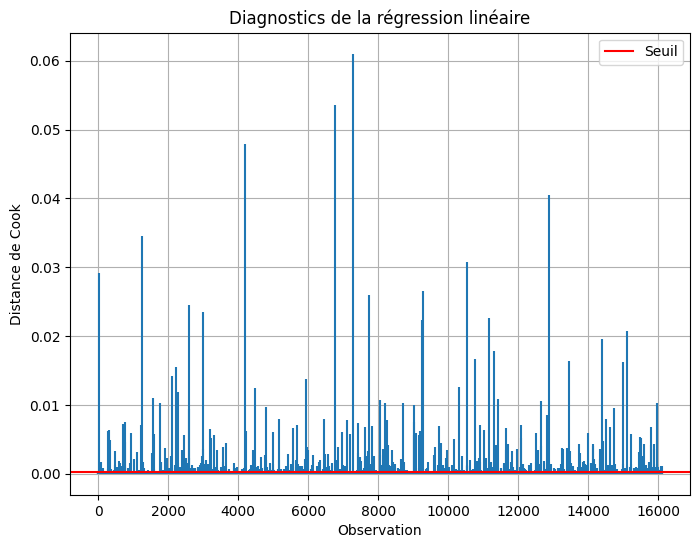

In [134]:
plt.subplots(figsize=(8, 6))
plt.vlines(range(n), 0, dcook)
plt.axhline(y=seuil_dcook, label='Seuil', color='red')
plt.grid()
plt.xlabel('Observation')
plt.ylabel('Distance de Cook')
plt.title('Diagnostics de la régression linéaire')
plt.legend(loc='best')
plt.show()

In [135]:
print('Observations avec un résidu studentisé dépassant les seuils :')
too_high = np.where(dcook > seuil_dcook)
nb_too_high = np.shape(too_high)[1]
pourcentage_too_high = nb_too_high/n*100

print(round(pourcentage_too_high,3), '% dépassent le seuil de levier')
if pourcentage_too_high > 5:
    print('ATTENTION BEAUCOUP DE DONNEES INFLUENTES')

Observations avec un résidu studentisé dépassant les seuils :
5.809 % dépassent le seuil de levier
ATTENTION BEAUCOUP DE DONNEES INFLUENTES


### Suppression des données atypiques et influentes

In [136]:
# Création d'un tableau avec les données atypiques avec la méthode des leviers

atypique = data.iloc[np.where(levier > seuil_levier)]

# Création d'un tableau avec les données influentes avec la méthode des distances de Cook

influente = data.iloc[np.where(dcook > seuil_dcook)]

# Création d'un tableau avec les données atypiques et influentes (interesection deux deux tableaux)

atypique_influente = data.iloc[np.where((levier > seuil_levier) & (dcook > seuil_dcook))]

# Drop des valeurs atypiques et influentes

data = data.drop(atypique_influente.index)          # OBTENTION DE NOUVELLES DONNEES NETTOYEES

# Exportation des nouvelles données nettoyées

data_cleaned_atypiques_influentes = data
data_cleaned_atypiques_influentes.to_csv('Data/data_cleaned_atypiques_influentes.csv', index=False)

# Informations sur les données
new_n = data.shape[0]
print(n-new_n, 'valeurs ont été retirées')
print((new_n-n)/n*100, '% des valeurs ont été retirées')
print(new_n, 'valeurs restantes')

933 valeurs ont été retirées
-5.790714995034757 % des valeurs ont été retirées
15179 valeurs restantes


In [137]:
#Calcul de la régression linéaire complète sur les données nettoyées (sans les valeurs atypiques et influentes)

var_Y= 'prix'
Y = data[var_Y]

var_X_comp = ['nb_chambres', 'nb_sdb', 'm2_interieur', 'm2_soussol', 'nb_etages', 'vue_mer', 'vue_note', 'etat_note', 'design_note', 'annee_construction', 'annee_renovation', 'm2_interieur_15voisins', 'm2_jardin_15voisins', 'zipcode', 'lat', 'long']
X_comp = data[var_X_comp]
linreg_comp_model = OLS(Y, X_comp)
linreg_comp = linreg_comp_model.fit()
linreg_comp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   prix   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                          2.137e+04
Date:                Wed, 03 Apr 2024   Prob (F-statistic):                        0.00
Time:                        19:38:59   Log-Likelihood:                     -1.9783e+05
No. Observations:               15179   AIC:                                  3.957e+05
Df Residuals:                   15163   BIC:                                  3.958e+05
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
nb_chambres            -1.523e+04   1403.542    -10.850      0.000    -1.8e+04   -1.25e+04
nb_sdb                  2.521e+04   2265.592     11.126      0.000    2.08e+04    2.96e+04
m2_interieur            1033.2188     30.292     34.109      0.000     973.843    1092.595
m2_soussol                 7.1396     33.620      0.212      0.832     -58.760      73.039
nb_etages               2.796e+04   2442.174     11.449      0.000    2.32e+04    3.27e+04
vue_mer                 5.342e+05   2.76e+04     19.373      0.000     4.8e+05    5.88e+05
vue_note                5.441e+04   1850.380     29.403      0.000    5.08e+04     5.8e+04
etat_note               2.899e+04   1601.095     18.108      0.000    2.59e+04    3.21e+04
design_note             8.734e+04   1524.287     57.296      0.000    8.43e+04    9.03e+04
annee_construction     -2044.3789     46.797    -43.686      0.000   -2136.106   -1952.652
annee_renovation          21.2329      2.657      7.991      0.000      16.025      26.441
m2_interieur_15voisins   430.4333     27.289     15.773      0.000     376.944     483.922
m2_jardin_15voisins      -10.1048      1.106     -9.132      0.000     -12.274      -7.936
zipcode                 -308.9836     12.186    -25.357      0.000    -332.869    -285.099
lat                     5.581e+05   7023.074     79.469      0.000    5.44e+05    5.72e+05
long                   -5.887e+04   8963.093     -6.568      0.000   -7.64e+04   -4.13e+04
==============================================================================
Omnibus:                      991.040   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1473.838
Skew:                           0.550   Prob(JB):                         0.00
Kurtosis:                       4.058   Cond. No.                     3.01e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.01e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [138]:
# AIC et BIC du modèle complet sans données atypiques et influentes

AIC_comp_atypique_influente = round(linreg_comp.aic, ndigits=1)
BIC_comp_atypique_influente = round(linreg_comp.bic, ndigits=1)


print('AIC de la régression linéaire complète :', AIC_comp_atypique_influente)
print('BIC de la régression linéaire complète :', BIC_comp_atypique_influente)

AIC de la régression linéaire complète : 395682.2
BIC de la régression linéaire complète : 395804.2


Le AIC et BIC diminuent quand on enlève les données atypiques et influentes : c'est cool

### Diagnostic de colinéarité

In [139]:
X = add_constant(data[['nb_chambres', 'nb_sdb', 'm2_interieur', 'm2_soussol', 'nb_etages', 'vue_mer', 'vue_note', 'etat_note', 'design_note', 'annee_construction', 'annee_renovation', 'm2_interieur_15voisins', 'm2_jardin_15voisins', 'zipcode', 'lat', 'long']])

VIF = pd.DataFrame()
VIF['Variables'] = X.columns
VIF['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(VIF[1:len(X.columns)])

                 Variables       VIF
1              nb_chambres  1.720070
2                   nb_sdb  3.073711
3             m2_interieur  5.510342
4               m2_soussol  1.958365
5                nb_etages  2.194388
6                  vue_mer  1.054003
7                 vue_note  1.183673
8                etat_note  1.299775
9              design_note  2.937354
10      annee_construction  2.588338
11        annee_renovation  1.133467
12  m2_interieur_15voisins  3.150337
13     m2_jardin_15voisins  1.243481
14                 zipcode  1.673147
15                     lat  1.188277
16                    long  1.919509


Aucun VIF > 10, donc pas de problème de colinéarité. (Cool)

## Sélection automatique de modèles de régression

### Méthode Backward

In [140]:
def linreg_backward_predictors(X, y, predictors, crit='BIC', verbose=True):
    results = []

    for combi in itertools.combinations(predictors, len(predictors)-1):
        results.append(AIC_BIC_linreg(X=X, y=y, features=list(combi)+['const']))
    models = pd.DataFrame(results)

    if crit == 'AIC':
        best_model = models.loc[models['AIC'].argmin()]
    else:
        best_model = models.loc[models['BIC'].argmin()]

    if verbose == True:
        print('Selected predictors:', best_model['model'].model.exog_names, 'AIC:', best_model['model'].aic, 'BIC:', best_model['model'].bic)

    return best_model

def linreg_backward_proc(X, y, crit='BIC', verbose=True):
    backward_models = pd.DataFrame(columns=['AIC', 'BIC', 'model'])
    predictors = list(X.columns.difference(['const']))

    for i in range(1, len(X.columns.difference(['const'])) + 1):
        backward_result = linreg_backward_predictors(X=X, y=y, predictors=predictors, crit=crit, verbose=verbose)
        if i > 1:
            if backward_result[crit] > backward_model_before:
                break
        backward_models.loc[i] = backward_result
        predictors = backward_models.loc[i]['model'].model.exog_names
        backward_model_before = backward_models.loc[i][crit]
        predictors = [k for k in predictors if k != 'const']

    return(backward_models['model'][len(backward_models['model'])])

In [141]:
linreg_backward = linreg_backward_proc(add_constant(X_comp), Y, crit='BIC', verbose=True)

Selected predictors: ['annee_construction', 'annee_renovation', 'design_note', 'etat_note', 'lat', 'long', 'm2_interieur', 'm2_interieur_15voisins', 'm2_jardin_15voisins', 'nb_chambres', 'nb_etages', 'nb_sdb', 'vue_mer', 'vue_note', 'zipcode', 'const'] AIC: 395680.58977913926 BIC: 395802.6324699013
Selected predictors: ['annee_construction', 'annee_renovation', 'design_note', 'etat_note', 'lat', 'm2_interieur', 'm2_interieur_15voisins', 'm2_jardin_15voisins', 'nb_chambres', 'nb_etages', 'nb_sdb', 'vue_mer', 'vue_note', 'zipcode', 'const'] AIC: 395724.77204065205 BIC: 395839.18706324144


In [142]:
print('Backward Procedure \n')

AIC_backward = round(linreg_backward.aic, ndigits=1)
BIC_backward = round(linreg_backward.bic, ndigits=1)

print('Covariables issues de la sélection backward :', linreg_backward.model.exog_names)
print('Nombre de covariables issues de la sélection backward :', linreg_backward.params.shape[0])
print('AIC de la régression linéaire avec sélection backward :', AIC_backward)
print('BIC de la régression linéaire avec sélection backward :', BIC_backward)

Backward Procedure 

Covariables issues de la sélection backward : ['annee_construction', 'annee_renovation', 'design_note', 'etat_note', 'lat', 'long', 'm2_interieur', 'm2_interieur_15voisins', 'm2_jardin_15voisins', 'nb_chambres', 'nb_etages', 'nb_sdb', 'vue_mer', 'vue_note', 'zipcode', 'const']
Nombre de covariables issues de la sélection backward : 16
AIC de la régression linéaire avec sélection backward : 395680.6
BIC de la régression linéaire avec sélection backward : 395802.6


### Méthode Forward

In [143]:
def linreg_forward_predictors(X, y, predictors, crit='BIC', verbose=True):
    results=[]
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]

    for p in remaining_predictors:
        results.append(AIC_BIC_linreg(X=X, y=y, features=predictors+[p]+['const']))
    models = pd.DataFrame(results)

    if crit == 'AIC':
        best_model = models.loc[models['AIC'].argmin()]
    else:
        best_model = models.loc[models['BIC'].argmin()]

    if verbose == True:
        print('Selected predictors:', best_model['model'].model.exog_names, 'AIC:', best_model['model'].aic, 'BIC:', best_model['model'].bic)

    return best_model

def linreg_forward_proc(X, y, crit='BIC', verbose=True):
    forward_models = pd.DataFrame(columns=['AIC', 'BIC', 'model'])
    predictors = []

    for i in range(1, len(X.columns.difference(['const'])) + 1):
        forward_result = linreg_forward_predictors(X=X, y=y, predictors=predictors, crit=crit, verbose=verbose)
        if i > 1:
            if forward_result[crit] > forward_model_before:
                break
        forward_models.loc[i] = forward_result
        predictors = forward_models.loc[i]['model'].model.exog_names
        forward_model_before = forward_models.loc[i][crit]
        predictors = [k for k in predictors if k != 'const']

    return(forward_models['model'][len(forward_models['model'])])

In [144]:
linreg_forward = linreg_forward_proc(add_constant(X_comp), Y, crit='BIC', verbose=True)

Selected predictors: ['design_note', 'const'] AIC: 408253.2000916891 BIC: 408268.45542803436
Selected predictors: ['design_note', 'lat', 'const'] AIC: 404039.66233873914 BIC: 404062.545343257
Selected predictors: ['design_note', 'lat', 'm2_interieur', 'const'] AIC: 401040.2032078727 BIC: 401070.7138805632
Selected predictors: ['design_note', 'lat', 'm2_interieur', 'annee_construction', 'const'] AIC: 398467.03891211306 BIC: 398505.17725297617
Selected predictors: ['design_note', 'lat', 'm2_interieur', 'annee_construction', 'vue_note', 'const'] AIC: 397304.7805052802 BIC: 397350.54651431594
Selected predictors: ['design_note', 'lat', 'm2_interieur', 'annee_construction', 'vue_note', 'vue_mer', 'const'] AIC: 396934.8253018212 BIC: 396988.2189790296
Selected predictors: ['design_note', 'lat', 'm2_interieur', 'annee_construction', 'vue_note', 'vue_mer', 'etat_note', 'const'] AIC: 396690.04061490425 BIC: 396751.0619602853
Selected predictors: ['design_note', 'lat', 'm2_interieur', 'annee_con

In [145]:
print('Forward Procedure \n')

AIC_forward = round(linreg_forward.aic, ndigits=1)
BIC_forward = round(linreg_forward.bic, ndigits=1)

print('Covariables issues de la sélection forward :', linreg_forward.model.exog_names)
print('Nombre de covariables issues de la sélection forward :', linreg_forward.params.shape[0])
print('AIC de la régression linéaire avec sélection forward :', AIC_forward)
print('BIC de la régression linéaire avec sélection forward :', BIC_forward)

Forward Procedure 

Covariables issues de la sélection forward : ['design_note', 'lat', 'm2_interieur', 'annee_construction', 'vue_note', 'vue_mer', 'etat_note', 'nb_etages', 'm2_interieur_15voisins', 'nb_sdb', 'zipcode', 'nb_chambres', 'm2_jardin_15voisins', 'annee_renovation', 'long', 'const']
Nombre de covariables issues de la sélection forward : 16
AIC de la régression linéaire avec sélection forward : 395680.6
BIC de la régression linéaire avec sélection forward : 395802.6


### Méthode Stepwise

In [146]:
def linreg_stepwise_proc(X, y, crit='BIC', verbose=True):
    stepwise_models = pd.DataFrame(columns=['AIC', 'BIC', 'model'])
    predictors = []
    stepwise_model_before = AIC_BIC_linreg(X, y, predictors+['const'])[crit]
    
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        forward_result = linreg_forward_predictors(X=X, y=y, predictors=predictors, crit=crit, verbose=verbose)
        stepwise_models.loc[i] = forward_result
        predictors = stepwise_models.loc[i]['model'].model.exog_names
        predictors = [k for k in predictors if k != 'const']
        backward_result = linreg_backward_predictors(X=X, y=y, predictors=predictors, crit=crit, verbose=verbose)
        if backward_result[crit]< forward_result[crit]:
            stepwise_models.loc[i] = backward_result
            predictors = stepwise_models.loc[i]['model'].model.exog_names
            stepwise_model_before = stepwise_models.loc[i][crit]
            predictors = [k for k in predictors if k != 'const']
        if stepwise_models.loc[i][crit]> stepwise_model_before:
            break
        else:
            stepwise_model_before = stepwise_models.loc[i][crit]
    return(stepwise_models['model'][len(stepwise_models['model'])])

In [147]:
linreg_stepwise = linreg_stepwise_proc(add_constant(X_comp), Y, crit='BIC', verbose=True)

Selected predictors: ['design_note', 'const'] AIC: 408253.2000916891 BIC: 408268.45542803436
Selected predictors: ['const'] AIC: 417312.63374624174 BIC: 417320.2614144144
Selected predictors: ['design_note', 'lat', 'const'] AIC: 404039.66233873914 BIC: 404062.545343257
Selected predictors: ['design_note', 'const'] AIC: 408253.2000916891 BIC: 408268.45542803436
Selected predictors: ['design_note', 'lat', 'm2_interieur', 'const'] AIC: 401040.2032078727 BIC: 401070.7138805632
Selected predictors: ['lat', 'm2_interieur', 'const'] AIC: 403485.25383290055 BIC: 403508.1368374184
Selected predictors: ['design_note', 'lat', 'm2_interieur', 'annee_construction', 'const'] AIC: 398467.03891211306 BIC: 398505.17725297617
Selected predictors: ['design_note', 'lat', 'm2_interieur', 'const'] AIC: 401040.2032078727 BIC: 401070.7138805632
Selected predictors: ['design_note', 'lat', 'm2_interieur', 'annee_construction', 'vue_note', 'const'] AIC: 397304.7805052802 BIC: 397350.54651431594
Selected predicto

In [148]:
print('Stepwise Procedure \n')

AIC_stepwise = round(linreg_stepwise.aic, ndigits=1)
BIC_stepwise = round(linreg_stepwise.bic, ndigits=1)

print('Covariables issues de la sélection stepwise :', linreg_stepwise.model.exog_names)
print('Nombre de covariables issues de la sélection stepwise :', linreg_stepwise.params.shape[0])
print('AIC de la régression linéaire avec sélection stepwise :', AIC_stepwise)
print('BIC de la régression linéaire avec sélection stepwise :', BIC_stepwise)

Stepwise Procedure 

Covariables issues de la sélection stepwise : ['design_note', 'lat', 'm2_interieur', 'annee_construction', 'vue_note', 'vue_mer', 'etat_note', 'nb_etages', 'm2_interieur_15voisins', 'nb_sdb', 'zipcode', 'nb_chambres', 'm2_jardin_15voisins', 'annee_renovation', 'long', 'const']
Nombre de covariables issues de la sélection stepwise : 16
AIC de la régression linéaire avec sélection stepwise : 395680.6
BIC de la régression linéaire avec sélection stepwise : 395802.6


## Evaluation des modèles

On considère deux modèles : le modèle complet et le modèle backward (équivalent à forward et stepwise).

In [149]:
def separation(X_comp, Y):
  apprent = np.random.binomial(n=1, p=0.2, size=data.shape[0])

  X_train = X_comp[apprent == 0]
  Y_train = Y[apprent == 0]

  X_test = X_comp[apprent == 1]
  Y_test = Y[apprent == 1]
  return(X_train, Y_train, X_test, Y_test)

#### Modèle complet

##### Erreur moyenne de prédiction

In [150]:
AIC=[]
BIC=[]

for i in range(100):
  X_train,Y_train,X_test,Y_test = separation(X_comp,Y)
  linreg = OLS(Y_train, X_train)
  linreg = linreg.fit()
  AIC.append(linreg.aic)
  BIC.append(linreg.bic)

AIC_mean = np.mean(AIC)
BIC_mean = np.mean(BIC)

print('Moyenne de AIC =', round(AIC_mean,ndigits=2) )
print('Moyenne de BIC =', round(BIC_mean,ndigits=2) )

Moyenne de AIC = 316392.03
Moyenne de BIC = 316510.49


In [151]:
prediction_percentage_error = []

for i in range(100):
    X_train, Y_train, X_test, Y_test = separation(X_comp, Y)
    reg = LinearRegression().fit(X_train, Y_train)
    Y_pred = reg.predict(X_test)

    mean_predicted_price = np.mean(Y_pred)
    mean_actual_price = np.mean(Y)

    prediction_percentage_error.append((mean_predicted_price - mean_actual_price) / mean_actual_price * 100)

print("Mean percentage difference:", round(np.mean(prediction_percentage_error),2), '%')


Mean percentage difference: 0.04 %


##### Calcul des RMSE et MAPE

In [152]:
def separation_complet(X_comp, Y):
    X_train, Y_train, X_test, Y_test = separation(X_comp, Y)
    reg = LinearRegression().fit(X_train, Y_train)
    Y_pred = reg.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(Y_test, Y_pred))
    MAPE = mean_absolute_percentage_error(Y_test, Y_pred)*100

    return(np.array([RMSE, MAPE]))

In [153]:
RMSE=[]
MAPE=[]
for i in range(100):
  RMSE.append(separation_complet(X_comp, Y)[0])
  MAPE.append(separation_complet(X_comp, Y)[1])
print('Moyenne du RMSE =', round(np.mean(RMSE),ndigits=2) )
print('Moyenne du MAPE =', round(np.mean(MAPE),ndigits=2) )
print('Ecart-type du RMSE =', round(np.std(RMSE),ndigits=2) )
print('Ecart-type du MAPE =', round(np.std(MAPE),ndigits=2) )

Moyenne du RMSE = 110641.13
Moyenne du MAPE = 19.62
Ecart-type du RMSE = 1358.24
Ecart-type du MAPE = 0.27


#### Modèle Backward ( = Forward = Stepwise)

##### Erreur moyenne de prédiciton

In [154]:
AIC=[]
BIC=[]
for i in range(100):
  X_train,Y_train,X_test,Y_test = separation(X_comp,Y)
  reg = linreg_backward_proc(add_constant(X_train), Y_train, crit='BIC', verbose=False)
  AIC.append(reg.aic)
  BIC.append(reg.bic)

AIC_mean = np.mean(AIC)
BIC_mean = np.mean(BIC)

print('Moyenne de AIC =', round(AIC_mean,ndigits=2) )
print('Moyenne de BIC =', round(BIC_mean,ndigits=2) )

Moyenne de AIC = 316891.26
Moyenne de BIC = 317009.75


**AIC et BIC qui sont honorables mais GROS PROBLEMES de prédiction et sur les valeurs des RMSE et MAPE**

In [155]:
X_train, Y_train, X_test, Y_test = separation(X_comp, Y)

reg = linreg_backward_proc(add_constant(X_train), Y_train, crit='BIC', verbose=True)

Y_pred = reg.predict(X_test)

mean_predicted_price = np.mean(Y_pred)
mean_actual_price = np.mean(Y)

prediction_percentage_error.append((mean_predicted_price - mean_actual_price) / mean_actual_price * 100)

print('\033[1;31mPROBLEME\033[0m')

print("Mean Predicted Price:", round(mean_predicted_price,2))
print("Mean Actual Price:", round(mean_actual_price,2))
print("Mean percentage difference:", round(np.mean(prediction_percentage_error),2), '%')

Selected predictors: ['annee_construction', 'annee_renovation', 'design_note', 'etat_note', 'lat', 'long', 'm2_interieur', 'm2_interieur_15voisins', 'm2_jardin_15voisins', 'nb_chambres', 'nb_etages', 'nb_sdb', 'vue_mer', 'vue_note', 'zipcode', 'const'] AIC: 318190.42080591404 BIC: 318308.9744216393
Selected predictors: ['annee_construction', 'annee_renovation', 'design_note', 'etat_note', 'lat', 'm2_interieur', 'm2_interieur_15voisins', 'm2_jardin_15voisins', 'nb_chambres', 'nb_etages', 'nb_sdb', 'vue_mer', 'vue_note', 'zipcode', 'const'] AIC: 318224.7491212299 BIC: 318335.8931359723
PROBLEME
Mean Predicted Price: 5894120267.2
Mean Actual Price: 487066.1
Mean percentage difference: 11980.51 %


In [156]:
def separation_backward(X_comp, Y):
    X_train, Y_train, X_test, Y_test = separation(X_comp, Y)
    reg = linreg_backward_proc(add_constant(X_train), Y_train, crit='BIC', verbose=False)
    Y_pred = reg.predict(X_test)

    RMSE = np.sqrt(mean_squared_error(Y_test, Y_pred))
    MAPE = mean_absolute_percentage_error(Y_test, Y_pred)*100

    return(np.array([RMSE, MAPE]))

print('\033[1;31mPROBLEME\033[0m')

print(separation_backward(X_comp, Y))

PROBLEME


[6.40255670e+09 1.61877867e+06]


In [157]:
RMSE = []
MAPE = []

for i in range(100):
    RMSE.append(separation_backward(X_comp, Y)[0])
    MAPE.append(separation_backward(X_comp, Y)[1])

print('Moyenne du RMSE =', round(np.mean(RMSE),ndigits=2) )
print('Moyenne du MAPE =', round(np.mean(MAPE),ndigits=2) )
print('Ecart-type du RMSE =', round(np.std(RMSE),ndigits=2) )
print('Ecart-type du MAPE =', round(np.std(MAPE),ndigits=2) )

Moyenne du RMSE = 6108622504.68
Moyenne du MAPE = 1524505.11
Ecart-type du RMSE = 161288731.86
Ecart-type du MAPE = 45518.63


## Comparaison des modèles

### Comparaion du AIC et BIC

In [158]:
# Modèle Complet avec données atypiques et influentes retirées

print('Modèle complet avec données atypiques et influentes retirées \n')
print('AIC :', AIC_comp_atypique_influente)
print('BIC :', BIC_comp_atypique_influente,'\n')

# Modèle Complet avec sélection backward

print('Modèle complet avec sélection backward \n')
print('AIC :', AIC_backward)
print('BIC :', BIC_backward,'\n')

# Modèle Complet avec sélection forward

print('Modèle complet avec sélection forward \n')
print('AIC :', AIC_forward)
print('BIC :', BIC_forward,'\n')

# Modèle Complet avec sélection stepwise

print('Modèle complet avec sélection stepwise \n')
print('AIC :', AIC_stepwise)
print('BIC :', BIC_stepwise)

Modèle complet avec données atypiques et influentes retirées 

AIC : 395682.2
BIC : 395804.2 

Modèle complet avec sélection backward 

AIC : 395680.6
BIC : 395802.6 

Modèle complet avec sélection forward 

AIC : 395680.6
BIC : 395802.6 

Modèle complet avec sélection stepwise 

AIC : 395680.6
BIC : 395802.6


Backward, forward et stepwise sont exactement equivalents. 

Le modèle obtenu par la sélection backward offre un meilleur ajustement aux données tout en étant moins complexe que le modèle complet (car AIC et BIC plus faible). La différence reste très faible et pas très significative.

## Prédiction avec le modèle OLS

In [160]:
print(linreg_comp.summary())

# Chargement de la base de données de test test_cleaned

data_test = pd.read_csv('Data/test_cleaned.csv')

# Prédiction du prix avec le modèle complet linreg_comp

X_test = data_test[var_X_comp]
Y_pred = linreg_comp.predict(X_test)

# Insertion des données retirées lors du nettoyage de BDD cleaned

test = pd.read_csv('Data/test_data.csv')

index_nb_chambres_list = test[test['nb_chambres'].isna()].index.to_list()
index_nb_chambres_list += test[test['nb_chambres'] == 0].index.to_list()
index_nb_sdb_list = test[test['nb_sdb'].isna()].index.to_list()
index_nb_sdb_list += test[test['nb_sdb'] == 0].index.to_list()

index_nb_chambres_sdb = list(set(index_nb_chambres_list + index_nb_sdb_list))
index_nb_chambres_sdb.sort()

print(index_nb_chambres_sdb)

mean_price = np.mean(data['prix'])


# Remplacement des valeurs manquantes par la moyenne des prix

for i in index_nb_chambres_sdb:
    Y_pred_left = Y_pred[:i]
    Y_pred_right = Y_pred[i:]
    Y_pred = np.concatenate((Y_pred_left, [mean_price], Y_pred_right))

# Compte les prix négatifs

nb_negatif = np.sum(Y_pred < 0)
index_negative = np.where(Y_pred < 0)[0].tolist()

print('Indices des prix négatifs :', index_negative)

print('Nombre de prix négatifs :', nb_negatif)

# Remplacement des prix négatifs par la moyenne des prix

mean_price = np.mean(data['prix'])

for i in index_negative:
    Y_pred[i] = mean_price

print('Nouveau nombre de prix négatifs :', np.sum(Y_pred < 0))

# Exportation des prédictions dans un fichier csv avec l'id de la vente et le prix

data_test_raw = pd.read_csv('Data/test_data.csv')
data_test_raw['prix'] = Y_pred
data_test_raw[['id', 'prix']].to_csv('Data/predictions_with_OLS.csv', index=False)

                                 OLS Regression Results                                
Dep. Variable:                   prix   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                          2.137e+04
Date:                Wed, 03 Apr 2024   Prob (F-statistic):                        0.00
Time:                        19:45:03   Log-Likelihood:                     -1.9783e+05
No. Observations:               15179   AIC:                                  3.957e+05
Df Residuals:                   15163   BIC:                                  3.958e+05
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------